# Bus Routes

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

In [2]:
gpd.list_layers('data/suntran.zip')

,name,geometry_type
0,busstops,Point
1,busroutes,LineString


In [3]:
bus_routes = gpd.read_file('data/suntran.zip', 
                          layer='busroutes').to_crs(4267)
bus_routes.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 11682 entries, 0 to 11681
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    11682 non-null  int64   
 1   TNODE_      11682 non-null  float64 
 2   LPOLY_      11682 non-null  float64 
 3   RPOLY_      11682 non-null  float64 
 4   LENGTH_FEE  11682 non-null  float64 
 5   SYSTEM_ID   11682 non-null  float64 
 6   STREET      11672 non-null  object  
 7   ROUTE       11682 non-null  float64 
 8   SYSTEM      11682 non-null  float64 
 9   DAYS        11615 non-null  object  
 10  DNTWN       11590 non-null  object  
 11  RTNAME      11578 non-null  object  
 12  PEAKFREQ    11682 non-null  float64 
 13  OFFPKFREQ   11682 non-null  float64 
 14  SATFREQ     11682 non-null  float64 
 15  SUNFREQ     11682 non-null  float64 
 16  FREQNOTES   11474 non-null  object  
 17  MILES       11682 non-null  float64 
 18  STLe        11682 non-null  float64 
 

In [4]:
bus_routes.iloc[0]

OBJECTID                                                      1
TNODE_                                                  38513.0
LPOLY_                                                      0.0
RPOLY_                                                      0.0
LENGTH_FEE                                             1338.025
SYSTEM_ID                                                   2.0
STREET                                              EUBANK BLVD
ROUTE                                                       2.0
SYSTEM                                                      1.0
DAYS                                                       M-Su
DNTWN                                                         N
RTNAME                                                   Eubank
PEAKFREQ                                                   30.0
OFFPKFREQ                                                  60.0
SATFREQ                                                    60.0
SUNFREQ                                 

In [5]:
bus_routes.drop(columns=['STLe', 'STLe', 'LPOLY_', 'MILES',
                         'RPOLY_', 'LENGTH_FEE'], inplace=True)

In [6]:
bus_routes.ROUTE = bus_routes.ROUTE.astype(int).astype(str)
bus_routes.SYSTEM = bus_routes.SYSTEM.astype(int).astype(str)
bus_routes.SYSTEM_ID = bus_routes.SYSTEM_ID.astype(int).astype(str)

In [7]:
new_names = dict(
    TNODE_ = 'TransitNode', 
    SYSTEM_ID = 'SystemID', 
    STREET = 'Street', 
    ROUTE = 'Route', 
    SYSTEM = 'System', 
    DAYS = 'ServiceDays', 
    DNTWN = 'ServesDowntown', 
    RTNAME = 'Name', 
    PEAKFREQ = 'FreqPeak', 
    OFFPKFREQ = 'FreqOffPeak', 
    SATFREQ = 'FreqSat', 
    SUNFREQ = 'FreqSun', 
    FREQNOTES = 'Notes'
)

In [8]:
bus_routes.rename(columns=new_names, inplace=True)
bus_routes.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 11682 entries, 0 to 11681
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   OBJECTID        11682 non-null  int64   
 1   TransitNode     11682 non-null  float64 
 2   SystemID        11682 non-null  object  
 3   Street          11672 non-null  object  
 4   Route           11682 non-null  object  
 5   System          11682 non-null  object  
 6   ServiceDays     11615 non-null  object  
 7   ServesDowntown  11590 non-null  object  
 8   Name            11578 non-null  object  
 9   FreqPeak        11682 non-null  float64 
 10  FreqOffPeak     11682 non-null  float64 
 11  FreqSat         11682 non-null  float64 
 12  FreqSun         11682 non-null  float64 
 13  Notes           11474 non-null  object  
 14  geometry        11680 non-null  geometry
dtypes: float64(5), geometry(1), int64(1), object(8)
memory usage: 1.3+ MB


In [9]:
bus_routes.iloc[51]

OBJECTID                                                         52
TransitNode                                                 38672.0
SystemID                                                          2
Street                                                  EUBANK BLVD
Route                                                             2
System                                                            1
ServiceDays                                                    M-Su
ServesDowntown                                                    N
Name                                                         Eubank
FreqPeak                                                       30.0
FreqOffPeak                                                    60.0
FreqSat                                                        60.0
FreqSun                                                        60.0
Notes                                                           n/a
geometry          LINESTRING (-106.5319749940816

In [10]:
bus_routes.to_file('../../../data/local/busses.gpkg', 
                  layer='busroutes')
bus_routes.to_file('../../../localData/City/busses.gpkg', 
                  layer='busroutes')

In [30]:
bus_stops = gpd.read_file('data/suntran.zip', 
                         layer='busstops').to_crs(4267)
bus_stops.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2809 entries, 0 to 2808
Data columns (total 35 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   OBJECTID    2809 non-null   int64         
 1   StopID      2809 non-null   int64         
 2   Date_       2808 non-null   datetime64[ms]
 3   T_Northing  2809 non-null   float64       
 4   T_Easting   2809 non-null   float64       
 5   ROUTE       2809 non-null   object        
 6   DIRECTION   2807 non-null   object        
 7   BUS_POSITI  2730 non-null   object        
 8   Bay_ID      24 non-null     object        
 9   STREET      2808 non-null   object        
 10  NEAR_INTER  2808 non-null   object        
 11  RELATIVE_T  2798 non-null   object        
 12  LANDMARKS   510 non-null    object        
 13  PAD         2731 non-null   object        
 14  CURB        2735 non-null   object        
 15  SIDEWALK    2734 non-null   object        
 16  SIGNS       2675

In [31]:
bus_stops.iloc[54]

OBJECTID                                                6035
StopID                                                  1149
Date_                                    2006-03-13 00:00:00
T_Northing                                     1530234.17568
T_Easting                                      1520872.93685
ROUTE                                                     98
DIRECTION                                                  W
BUS_POSITI                                          Shoulder
Bay_ID                                                  None
STREET                                               ALAMEDA
NEAR_INTER                                             COORS
RELATIVE_T                                        FAR MIDBLK
LANDMARKS                                              LOWES
PAD                                                     Dirt
CURB                                                       N
SIDEWALK                                                   Y
SIGNS                   

In [32]:
drops = ['Date_', 'T_Northing', 'T_Easting', 
         'Lat', 'Long', 'FX_id_sync', 'TUBE_SCHED', 
        'SIGN_MOUNT', 'Out_of_Ser', 'Picture', 'STOP_NUM']
bus_stops.drop(columns=drops, inplace=True)

In [33]:
bus_stops.loc[bus_stops.DIRECTION == 'w','DIRECTION'] = 'WB'
bus_stops.loc[bus_stops.DIRECTION == 'N/S','DIRECTION'] = 'Shared'
bus_stops.loc[bus_stops.DIRECTION == 'UTC - South','DIRECTION'] = 'UTC'
bus_stops.loc[bus_stops.DIRECTION == 'LAY','DIRECTION'] = 'Layover'
bus_stops.loc[bus_stops.DIRECTION == 'West','DIRECTION'] = 'WB'
bus_stops.loc[bus_stops.DIRECTION == 'South','DIRECTION'] = 'WS'
bus_stops.loc[bus_stops.DIRECTION == 'North','DIRECTION'] = 'NB'
bus_stops.loc[bus_stops.DIRECTION == 'Eastbound','DIRECTION'] = 'EB'
bus_stops.loc[bus_stops.DIRECTION == 'East','DIRECTION'] = 'EB'
bus_stops.loc[bus_stops.DIRECTION == 'NN','DIRECTION'] = 'Shared'
bus_stops.loc[bus_stops.DIRECTION == 'WS','DIRECTION'] = 'Shared'
bus_stops.loc[bus_stops.DIRECTION == 'E','DIRECTION'] = 'EB'
bus_stops.loc[bus_stops.DIRECTION == 'W','DIRECTION'] = 'WB' 
bus_stops.loc[bus_stops.DIRECTION == 'S','DIRECTION'] = 'SB' 
bus_stops.loc[bus_stops.DIRECTION == 'N','DIRECTION'] = 'NB'

In [34]:
bus_stops.loc[(bus_stops.BUS_POSITI == 'pull-out') | 
              (bus_stops.BUS_POSITI == 'Pull-out'), 
              'BUS_POSITI'] = 'Pullout'

In [35]:
bus_stops.loc[
    (bus_stops.BUS_POSITI == 'Bike lane') | 
    (bus_stops.BUS_POSITI == 'BIKE LANE'), 
    'BUS_POSITI'] = 'Bike Lane'

In [36]:
bus_stops.loc[
    (bus_stops.BUS_POSITI == 'IN TRAFFIC') | 
    (bus_stops.BUS_POSITI == 'In traffic') | 
    (bus_stops.BUS_POSITI == 'in Traffic') | 
    (bus_stops.BUS_POSITI == 'iN tRAFFIC') | 
    (bus_stops.BUS_POSITI == 'In Traddic') | 
    (bus_stops.BUS_POSITI == 'In traddic') | 
    (bus_stops.BUS_POSITI == 'in traffic') | 
    (bus_stops.BUS_POSITI == 'In Street') | 
    (bus_stops.BUS_POSITI == 'On Traffic'), 
    'BUS_POSITI'] = 'In Traffic'

In [37]:
bus_stops.loc[
    (bus_stops.BUS_POSITI == 'sHOULDER') | 
    (bus_stops.BUS_POSITI == 'SHOULDER'), 
    'BUS_POSITI'] = 'Shoulder'

In [38]:
bus_stops.loc[:,'CURB'] = [True if c == 'Y' else False 
                          for c in bus_stops.CURB]
bus_stops.CURB = bus_stops.CURB.astype(bool)

In [39]:
bus_stops.loc[:,'SIDEWALK'] = [True if (c == 'Y') |
                                       (c == 'y') | 
                                       (c == 'Y`') 
                                    else False 
                               for c in bus_stops.SIDEWALK]
bus_stops.SIDEWALK = bus_stops.SIDEWALK.astype(bool)

In [40]:
bus_stops.loc[:,'SIGNS'] = [False if (c == 'None') |
                                     (c == None) | 
                                     (c == 'Noth') 
                                  else True 
                            for c in bus_stops.SIGNS]
bus_stops.SIGNS = bus_stops.SIGNS.astype(bool)

In [41]:
bus_stops.loc[:,'BRAIL_PAD'] = [True if (c == 'Y') |
                                       (c == '1') | 
                                       (c == 'Stop ID') 
                                    else False 
                               for c in bus_stops.BRAIL_PAD]

bus_stops.BRAIL_PAD = bus_stops.BRAIL_PAD.astype(bool)

In [42]:
bus_stops.loc[(bus_stops.Juris == 'Los Rancho') | 
              (bus_stops.Juris == 'Los Ranch') | 
              (bus_stops.Juris == 'Los Ranch*')
            , 'Juris'] = 'Los Ranchos'

In [43]:
bus_stops.loc[(bus_stops.Juris == 'COUNTY'), 'Juris'] = 'County'

In [44]:
bus_stops.loc[(bus_stops.Juris == 'COA') | 
              (bus_stops.Juris == 'CABQ') | 
              (bus_stops.Juris == 'Cabq') | 
              (bus_stops.Juris == 'Coa')
            , 'Juris'] = 'Albuquerque'

In [45]:
renames = {
    'DIRECTION':'Direction', 
    'SIDEWALK': 'Sidewalk',
    'BUS_POSITI': 'BusPosition',
    'ROUTE':'Route', 
    'Bay_ID':'BayID', 
    'STREET': 'Street', 
    'NEAR_INTER':'NearestIntersection', 
    'RELATIVE_T':'RelativeTo', 
    'LANDMARKS':'Landmarks', 
    'PAD':'Pad', 
    'CURB':'Curb', 
    'SIGNS':'Signs', 
    'BRAIL_PAD':'BrailPad', 
    'FLAT_SCJED':'FlatSchedule', 
    'BENCH':'Bench', 
    'SHELTER':'Shelter', 
    'TRASHCAN':'TrashCan', 
    'COMMENTS':'Comments', 
    'Juris':'Jurisdiction', 
    'FLAT_SCHED':'FlatSchedule'
}
bus_stops.rename(columns=renames, inplace=True)

In [46]:
bus_stops.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2809 entries, 0 to 2808
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   OBJECTID             2809 non-null   int64   
 1   StopID               2809 non-null   int64   
 2   Route                2809 non-null   object  
 3   Direction            2807 non-null   object  
 4   BusPosition          2730 non-null   object  
 5   BayID                24 non-null     object  
 6   Street               2808 non-null   object  
 7   NearestIntersection  2808 non-null   object  
 8   RelativeTo           2798 non-null   object  
 9   Landmarks            510 non-null    object  
 10  Pad                  2731 non-null   object  
 11  Curb                 2809 non-null   bool    
 12  Sidewalk             2809 non-null   bool    
 13  Signs                2809 non-null   bool    
 14  BrailPad             2809 non-null   bool    
 15  FlatSchedule 

In [47]:
bus_stops.to_file('../../../data/local/busses.gpkg', 
                 layer='busstops')
bus_stops.to_file('../../../localData/City/busses.gpkg', 
                 layer='busstops')

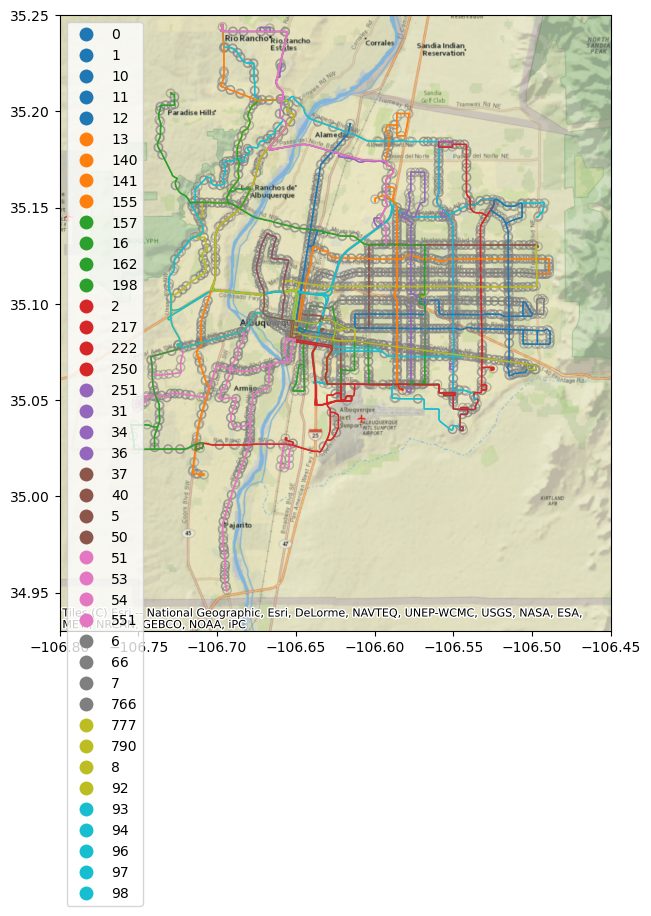

In [49]:
f, ax = plt.subplots(figsize=(10,8))
bus_stops.plot(ax=ax, color='k', facecolor='none', edgecolor='grey', alpha=0.5)
bus_routes.plot(ax=ax, column='Route', linewidth=1, legend=True)
ax.set_ylim(34.93, 35.25)
ax.set_xlim(-106.8, -106.45)
ctx.add_basemap(ax, crs=bus_routes.crs, 
                source=ctx.providers.Esri.NatGeoWorldMap);